## Series 的创建

Series 类似于一维数组对象，区别是带了索引

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [ ]:
s = Series([17, 17.81, 17.90, 18, 19, np.nan])
s

可以发现，导入自动生成索引，索引默认从  0  开始。

同时你也可以指定索引。

In [4]:
s_1 = Series([17, 17.81, 17.90, 18, 19, np.nan], index=['zyh', 'yrz', 'zle', 'zj', 'yle', 'yj', ])
s_1

zyh    17.00
yrz    17.81
zle    17.90
zj     18.00
yle    19.00
yj       NaN
dtype: float64

索引必须和数据一一对应，不能多不能少。  NaN  是一个空值。

这是一种最常见的构建  Series  的方式。还可以用字典类型构建  Series  。

In [5]:
s_dict = {'zyh': 23, 'yrz': 18}
s_2 = Series(s_dict)
s_2

zyh    23
yrz    18
dtype: int64

## Series  的数值计算

可以直接让整个数组加上  1  

In [6]:
s_3 = Series([1, 2, 3, ])
s_3 + 1

0    2
1    3
2    4
dtype: int64

可以直接对数组用乘法，广播性质

In [7]:
s_3 * 2

0    2
1    4
2    6
dtype: int64

也可以指数运算。

In [8]:
np.exp(s_3)

0     2.718282
1     7.389056
2    20.085537
dtype: float64

## DataFrame  的创建

DataFrame  就是一个类似多维数组的对象，拥有一组索引或者多组索引。

DataFrame  是由一个个  Series  组成的，不是其他一维结构。

In [9]:
D = DataFrame({'姓名': ['zyh', 'yrz'], '年龄': [23, '永远18']})
D

,姓名,年龄
0,zyh,23
1,yrz,永远18


也可以通过数组来创建  DataFrame  。

In [9]:
arr = np.random.randn(6, 4).cumsum(0)
D_1 = DataFrame(arr)
D_1

,0,1,2,3
0,0.149033,0.578938,1.134376,-0.868772
1,-0.629178,0.998353,-0.098183,-0.115855
2,-0.067349,0.695582,0.506759,-0.582896
3,-0.016844,-0.409125,-0.056771,-0.240455
4,0.538129,-2.791642,-2.275982,0.078280
5,0.118662,-3.476405,-0.932592,1.707513


DataFrame  同样可以显式指定索引值，于  Series  一样都要一一对应

In [10]:
D_2 = DataFrame(np.random.randn(2, 2).cumsum(0), columns=['A', 'B'], index=['C', 'D'])
D_2

,A,B
C,0.986994,0.639489
D,-0.880356,-0.046881


如果对应的列没有数据，就会自动产生  NaN  值来代替空位。

##  DataFrame  的基本属性

DataFrame  还可以对索引和列命名。与索引值不同，这里指的是索引名，可以理解为表的属性类别。

In [11]:
D_3 = DataFrame([['ZYH', 'YRZ', ], ['zyh', 'yrh']], columns=['man', 'woman'], index=['old', 'young'])

In [12]:
D_3.columns.name = 'sex'
D_3.index.name = 'age'
D_3

sex,man,woman
age,,
old,ZYH,YRZ
young,zyh,yrh


为了安全性，  index  对象不可修改。  colunms  对象也不可修改

In [13]:
D_2.index

Index(['C', 'D'], dtype='object')

In [14]:
D_2.index[1]

'D'

In [15]:
D_2.index[1] = 'DD'

TypeError: Index does not support mutable operations

In [16]:
D_2.columns[1] = 'DD'

TypeError: Index does not support mutable operations

如果你真的需要改，那就需要整个改掉，不能单单改一个。

In [17]:
D_2.columns = ['更改列 1', '更改列 2', ]
D_2.index = ['更改行 1', '更改行 2']
D_2

,更改列 1,更改列 2
更改行 1,0.986994,0.639489
更改行 2,-0.880356,-0.046881


你可以用属性的方式访问  DataFrame  的数据，也可以像  dict  一样直接映射访问。

In [19]:
D_2 = DataFrame(np.random.randn(2, 2).cumsum(0), columns=['A', 'B'], index=['C', 'D'])

In [20]:
D_2.A

C    0.134302
D    0.045986
Name: A, dtype: float64

In [21]:
D_2['A']

C    0.134302
D    0.045986
Name: A, dtype: float64

 ## pandas  数据结构的基本操作

 首先是转置操作：

In [22]:
D_2.T

,C,D
A,0.134302,0.045986
B,-0.033381,1.597496


### 索引


In [24]:
data = {'姓名': ['李大', '王二', '张三', '李四'], '薪酬': [10000, 8000, 12000, 5000, ], '工作': ['程序员', '程序员鼓励师', '产品经理', '运营']}
D_1 = DataFrame(data, columns=['姓名', '薪酬', '工作', '是否有女朋友'], index=['one', 'two', 'three', 'four'])
D_1

,姓名,薪酬,工作,是否有女朋友
one,李大,10000,程序员,NaN
two,王二,8000,程序员鼓励师,NaN
three,张三,12000,产品经理,NaN
four,李四,5000,运营,NaN


位置有三种查找方式，分别是  ix, loc, iloc。

ix  不推荐使用，因为它既可以用数字来索引，也可以用字符串来索引，所以它很乱最好不要用。

iloc  主要使用数字来索引，不能使用字符型索引，

loc  只能用字符型来索引，不能使用数字来索引。

In [25]:
D_1.loc['one']

姓名           李大
薪酬        10000
工作          程序员
是否有女朋友      NaN
Name: one, dtype: object

In [26]:
D_1.iloc['one']

TypeError: Cannot index by location index with a non-integer key

In [27]:
D_1.iloc[0]

姓名           李大
薪酬        10000
工作          程序员
是否有女朋友      NaN
Name: one, dtype: object

具体到哪一行哪一列的操作如下：

In [29]:
D_1.loc['one', '姓名']

'李大'

In [30]:
D_1.iloc[0, 0]

'李大'

同时可以使用 : 读取多行内容

In [31]:
D_1.iloc[0:1, 0]

one    李大
Name: 姓名, dtype: object

In [32]:
D_1.loc['one': 'two', '姓名']

one    李大
two    王二
Name: 姓名, dtype: object

看上面，当用字符串的时候，不再是左闭右开，而是左闭右闭。

而且需要注意的是，虽然  loc  不支持数字索引，但是如果索引本身就是数字，那么就可以索引。

pandas  支持同时索引，只要传入一个列表即可

In [33]:
D_1[['姓名', '工作']]

,姓名,工作
one,李大,程序员
two,王二,程序员鼓励师
three,张三,产品经理
four,李四,运营


### 小技巧

如果不在  jupyter notebook  下开发，数据可能会对不齐：

In [34]:
data = {'姓名': ['李大~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~', '王二', '张三', '李四'],
        '薪酬': [10000, 8000, 12000, 5000, ],
        '工作': ['程序员', '程序员鼓励师', '产品经理', '运营']}
D_1 = DataFrame(data, columns=['姓名', '薪酬', '工作', '是否有女朋友'], index=['one', 'two', 'three', 'four'])
D_1

,姓名,薪酬,工作,是否有女朋友
one,李大~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~,10000,程序员,NaN
two,王二,8000,程序员鼓励师,NaN
three,张三,12000,产品经理,NaN
four,李四,5000,运营,NaN


具体的处理如下：

In [35]:
from terminaltables import AsciiTable

In [36]:
head = list(D_2)
content = D_2.values.tolist()
data_1 = [head]
for i in range(len(content)):
    data_1.append(content[i])
data_1 = AsciiTable(data_1)

In [37]:
data_1.table

'+---------------------+----------------------+\n| A                   | B                    |\n+---------------------+----------------------+\n| 0.13430213558467538 | -0.03338058424250861 |\n| 0.04598619572845104 | 1.5974957670657552   |\n+---------------------+----------------------+'

## DataFrame  关系型操作

根据现实情况，数据之间的联系从而设置某些条件，实现选取、过滤功能

In [38]:
s = Series([1, 2, 3, 4, ], index=['a', 'b', 'c', 'd', ])
s[['a', 'b']]

a    1
b    2
dtype: int64

In [39]:
D_3 = DataFrame(np.arange(16).reshape(4, 4), index=['one', 'two', 'three', 'four'], columns=['five', 'six', 'seven', 'eight'])
D_3

,five,six,seven,eight
one,0,1,2,3
two,4,5,6,7
three,8,9,10,11
four,12,13,14,15


比如我现在想选择  five  列数据大于  6  的所有行

In [41]:
D_3[D_3['five'] > 6]

,five,six,seven,eight
three,8,9,10,11
four,12,13,14,15


In [42]:
D_3[D_3['five'] == 6]

,five,six,seven,eight


也可以这样：

In [43]:
D_3 < 6

,five,six,seven,eight
one,True,True,True,True
two,True,True,False,False
three,False,False,False,False
four,False,False,False,False


## DataFrame  的画图操作

In [44]:
D_4 = DataFrame([[89, 90], [91, 89], [100, 70]],
                columns=['zyh', 'yrz'],
                index=['one', 'two', 'three'])
D_4.columns.name = 'name'
D_4.index.name = 'grade'
D_4

name,zyh,yrz
grade,,
one,89,90
two,91,89
three,100,70


In [45]:
from matplotlib import pyplot as plt

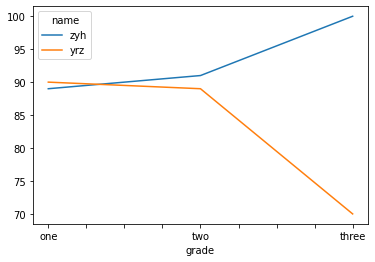

In [46]:
D_4.plot()
plt.show()

利用  DataFrame  可以很方便画出条形图，散点图，密度图，直方图等。

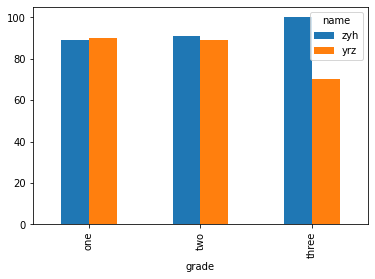

In [47]:
D_4.plot(kind='bar')
plt.show()

直方图可以看到两个人考试分数的集中区域在哪里

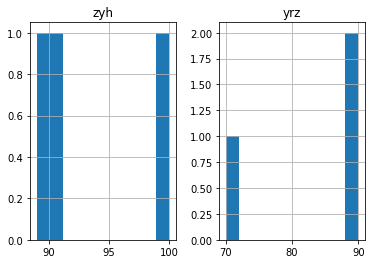

In [50]:
D_4.hist()
plt.show()

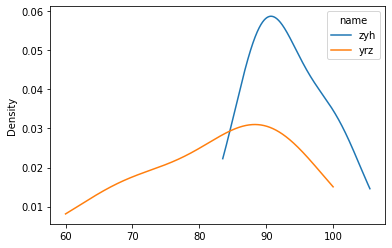

In [54]:
D_4.plot(kind='kde')
plt.show()

也可以用每一个  serise  去绘制图表

In [56]:
D_5 = DataFrame([[11, 44, 77], [22, 55, 88], [33, 66, 99]], columns=['AA', 'BB', 'CC'])
D_5

,AA,BB,CC
0,11,44,77
1,22,55,88
2,33,66,99


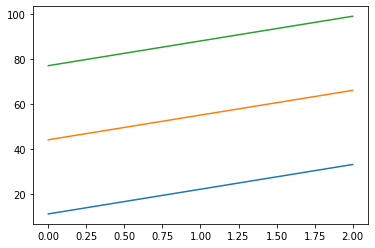

In [57]:
plt.plot(D_5.AA)
plt.plot(D_5.BB)
plt.plot(D_5.CC)
plt.show()

查看数据

In [58]:
D_5.head(1)

,AA,BB,CC
0,11,44,77


In [59]:
D_5.tail(1)

,AA,BB,CC
2,33,66,99


In [62]:
D_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AA      3 non-null      int64
 1   BB      3 non-null      int64
 2   CC      3 non-null      int64
dtypes: int64(3)
memory usage: 200.0 bytes


In [63]:
D_5.value_counts()

AA  BB  CC
11  44  77    1
22  55  88    1
33  66  99    1
dtype: int64

In [64]:
D_5.shape

(3, 3)